Saving my.png to my.png


Action: emotion: 100%|██████████| 3/3 [00:07<00:00,  2.37s/it]


📂 파일: input.jpg
🧓 나이: 30세 | 성별: Man | 감정: fear
🧠 추정된 MBTI: INTJ
💐 추천 향수: MUSK (2방울), VANILLA AMBER (1방울), BOUQUET (1방울)
👗 추천 패션: 톤 다운 스웨터 + 코듀로이 팬츠


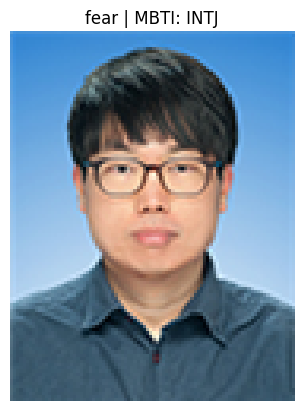

In [1]:
# 1. 설치
!pip install deepface

# 2. 라이브러리
from deepface import DeepFace
from PIL import Image
import matplotlib.pyplot as plt
import shutil
from google.colab import files

# 3. 매핑 정의
emotion_perfume_map = {
    'happy': ['FRUITY (2방울)', 'MUGET (1방울)', 'CITRUS (1방울)'],
    'sad': ['VANILLA AMBER (2방울)', 'BOUQUET (1방울)', 'SOAP (1방울)'],
    'angry': ['WOODY (2방울)', 'GREEN (1방울)', 'MUSK (1방울)'],
    'surprise': ['OCEAN (2방울)', 'CITRUS (1방울)', 'FRUITY (1방울)'],
    'neutral': ['SOAP (2방울)', 'GREEN (1방울)', 'MUGET (1방울)'],
    'fear': ['MUSK (2방울)', 'VANILLA AMBER (1방울)', 'BOUQUET (1방울)'],
    'disgust': ['CITRUS (2방울)', 'SOAP (1방울)', 'OCEAN (1방울)']
}

emotion_fashion_map = {
    'happy': ['밝은 셔츠 + 청바지', '파스텔 원피스'],
    'sad': ['그레이 니트 + 슬랙스', '차분한 트렌치코트'],
    'angry': ['블랙 재킷 + 데님 팬츠', '스트릿 룩 후디'],
    'surprise': ['컬러 블록 재킷 + 치노 팬츠', '캐주얼 셋업'],
    'neutral': ['화이트 셔츠 + 베이지 팬츠', '심플 니트 + 슬랙스'],
    'fear': ['톤 다운 스웨터 + 코듀로이 팬츠'],
    'disgust': ['심플 셋업 + 스카프']
}

# 4. MBTI 추정 함수
def infer_mbti(age, gender, emotion):
    ei = 'E' if emotion in ['happy', 'surprise'] else 'I'
    sn = 'N' if emotion in ['neutral', 'fear'] else 'S'
    tf = 'T' if gender == 'Man' else 'F'
    jp = 'J' if age >= 30 else 'P'
    return ei + sn + tf + jp

# 5. 분석 및 결과 출력 함수
def analyze_and_recommend(image_path):
    result = DeepFace.analyze(img_path=image_path, actions=['age', 'gender', 'emotion'], enforce_detection=False)
    age = result[0]['age']
    gender = result[0]['dominant_gender']
    emotion = result[0]['dominant_emotion']
    mbti = infer_mbti(age, gender, emotion)

    perfumes = emotion_perfume_map.get(emotion, ['기본 향수'])
    outfits = emotion_fashion_map.get(emotion, ['기본 코디'])

    print(f"\n📂 파일: {image_path}")
    print(f"🧓 나이: {age}세 | 성별: {gender} | 감정: {emotion}")
    print(f"🧠 추정된 MBTI: {mbti}")
    print(f"💐 추천 향수: {', '.join(perfumes)}")
    print(f"👗 추천 패션: {', '.join(outfits)}")

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{emotion} | MBTI: {mbti}")
    plt.show()

# 6. 파일 업로드 및 분석 실행
uploaded = files.upload()
original_filename = list(uploaded.keys())[0]
image_path = "input.jpg"
shutil.copy(original_filename, image_path)
analyze_and_recommend(image_path)
